Facebook metrics Data Set

Facebook performance metrics of a renowned cosmetic's brand Facebook page.

In [1]:
#import thư viện 
import numpy as np, pandas as pd 
import matplotlib.pyplot as plt 
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) 

ModuleNotFoundError: No module named 'numpy'

In [2]:
#Link data phần 9a 
link='https://drive.google.com/file/d/14DbjGa41Yc4-UDVka2gUwepqwoKBUlc2/view?usp=share_link' 

In [4]:
#Đọc data 
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2] 
df = pd.read_csv(path) 

NameError: name 'pd' is not defined

In [5]:
#Xem thông tin cơ bản của dữ liệu 
df.head(5) 
#df.info() 
#df.describe() 
#df.tail(5) 
#df.sample(5) 

NameError: name 'df' is not defined

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Page total likes           500 non-null    int64  
 1   Type                       500 non-null    object 
 2   Post Month                 500 non-null    int64  
 3   Post Weekday               500 non-null    int64  
 4   Post Hour                  500 non-null    int64  
 5   Paid                       499 non-null    float64
 6   Lifetime Post Total Reach  500 non-null    int64  
 7   Lifetime Engaged Users     500 non-null    int64  
 8   comment                    500 non-null    int64  
 9   like                       499 non-null    float64
 10  share                      496 non-null    float64
 11  Total Interactions         500 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 47.0+ KB


In [ ]:
df.isna().sum()

Page total likes             0
Type                         0
Post Month                   0
Post Weekday                 0
Post Hour                    0
Paid                         1
Lifetime Post Total Reach    0
Lifetime Engaged Users       0
comment                      0
like                         1
share                        4
Total Interactions           0
dtype: int64

In [1]:
df.dropna(subset=["Paid"], axis=0, inplace=True)
df.dropna(subset=["like"], axis=0, inplace=True)
df.dropna(subset=["share"], axis=0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 1 to 499
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Page total likes           495 non-null    int64  
 1   Type                       495 non-null    object 
 2   Post Month                 495 non-null    int64  
 3   Post Weekday               495 non-null    int64  
 4   Post Hour                  495 non-null    int64  
 5   Paid                       495 non-null    float64
 6   Lifetime Post Total Reach  495 non-null    int64  
 7   Lifetime Engaged Users     495 non-null    int64  
 8   comment                    495 non-null    int64  
 9   like                       495 non-null    float64
 10  share                      495 non-null    float64
 11  Total Interactions         495 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 50.3+ KB


In [ ]:
df.head() 

,Page total likes,Type,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Engaged Users,comment,like,share,Total Interactions
1,81370,Photo,1,4,11,0.0,4156,626,4,79.0,17.0,100
2,81370,Photo,1,5,2,0.0,3778,625,5,137.0,10.0,152
3,81370,Photo,1,5,8,0.0,3480,537,0,66.0,14.0,80
4,85093,Photo,1,1,2,0.0,8412,1179,19,325.0,49.0,393
5,85093,Photo,1,7,10,0.0,5400,810,3,113.0,26.0,142


<Axes: >

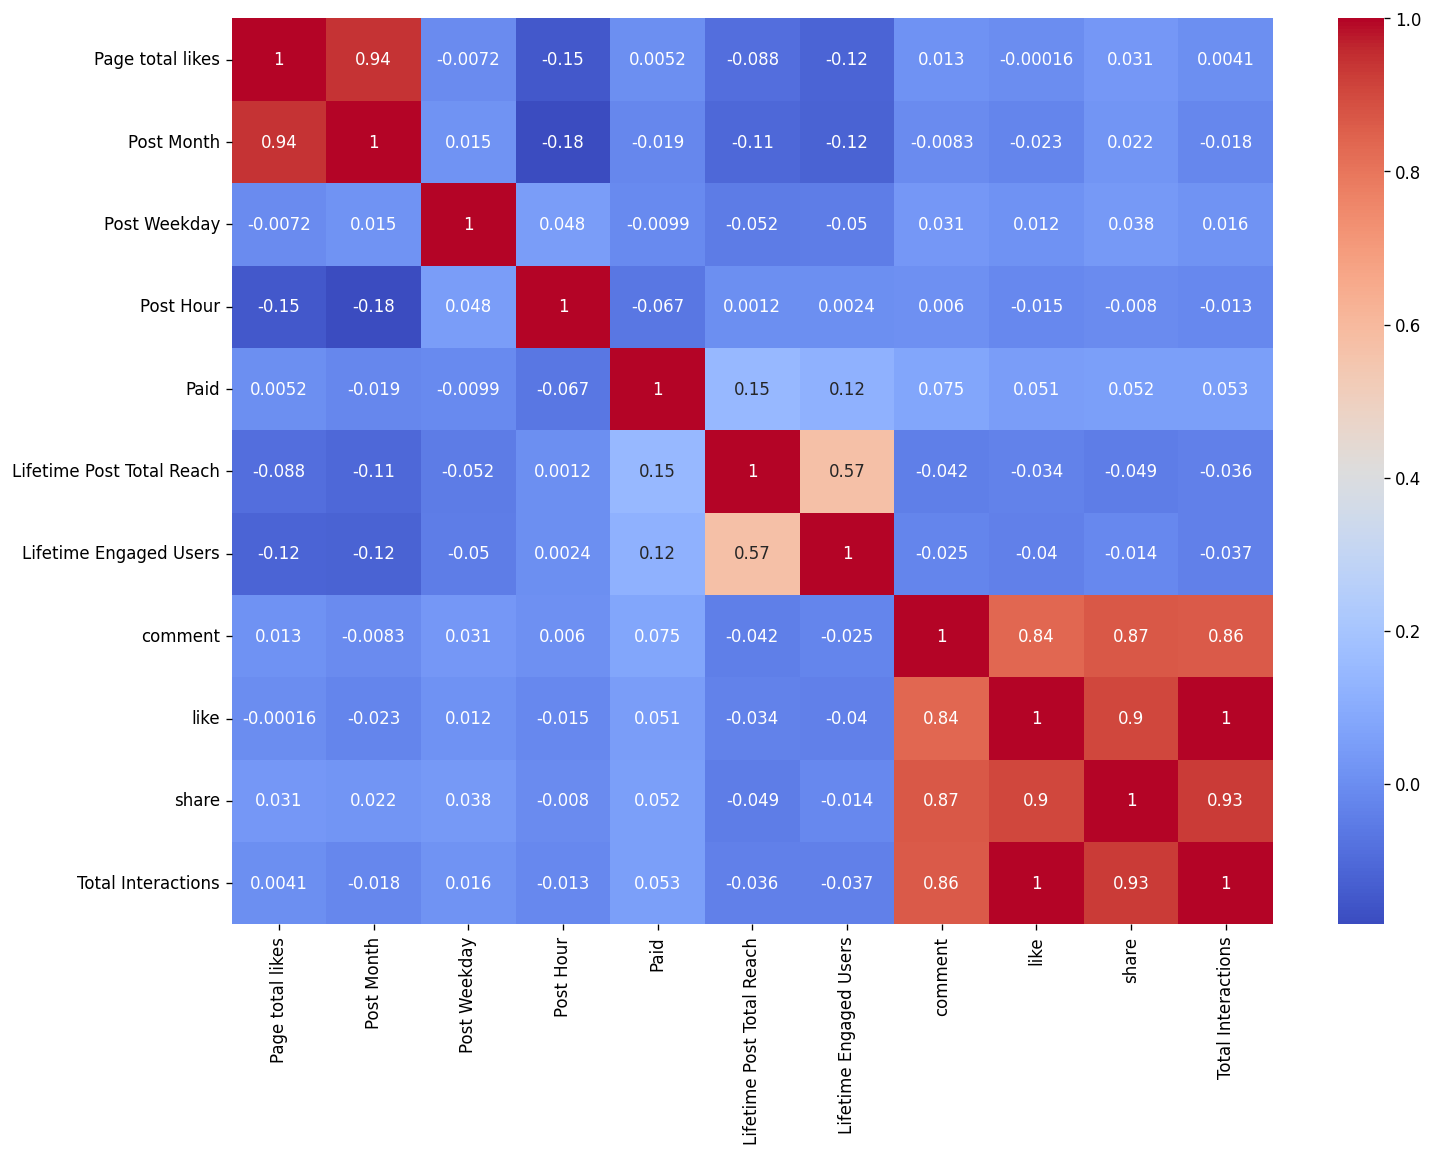

In [ ]:
#Ma trận tương quan
import seaborn as sns 
plt.figure(figsize=(14,10)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') 

In [ ]:
df['Paid'].value_counts() 

0.0    357
1.0    138
Name: Paid, dtype: int64

In [ ]:
df2 = df[['Paid','Lifetime Post Total Reach','Lifetime Engaged Users','Total Interactions']]
df2

,Paid,Lifetime Post Total Reach,Lifetime Engaged Users,Total Interactions
1,0.0,4156,626,100
2,0.0,3778,625,152
3,0.0,3480,537,80
4,0.0,8412,1179,393
5,0.0,5400,810,142
...,...,...,...,...
495,0.0,3112,208,152
496,0.0,2847,193,110
497,0.0,2752,178,83
498,0.0,2549,249,66


In [ ]:
y = df2["Paid"].values 
X=df2.iloc[:, 1: ].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[101,   0],
       [ 47,   1]])

Text(0.5, 8.666666666666668, 'Dự báo')

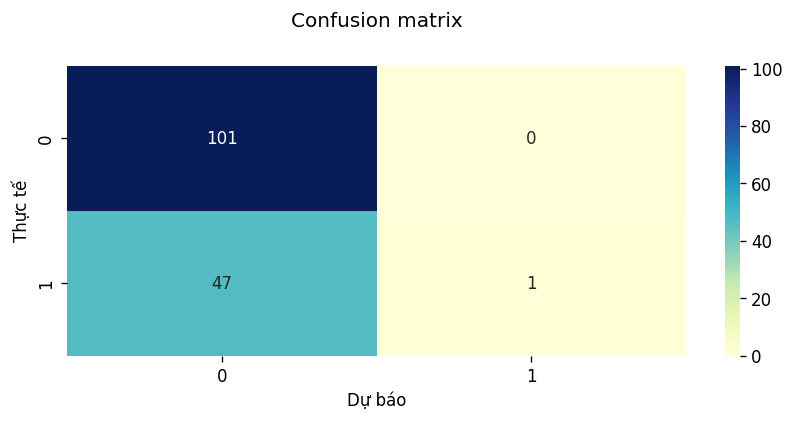

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report#, plot_confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81       101
         1.0       1.00      0.02      0.04        48

    accuracy                           0.68       149
   macro avg       0.84      0.51      0.43       149
weighted avg       0.78      0.68      0.56       149



In [ ]:
df['Paid'].value_counts() #Đếm số lượngc các giá trị trong cột y

0.0    357
1.0    138
Name: Paid, dtype: int64

<Axes: ylabel='Paid'>

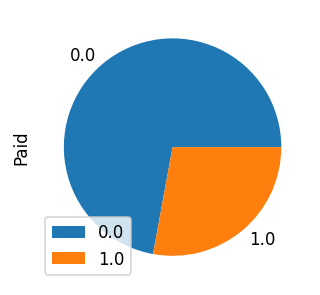

In [ ]:
df['Paid'].value_counts().plot.pie(legend = ["0", "1"])

In [ ]:
#Undersampling - Phân chia thủ công
df_0=df2[df2.Paid==0] #Chia bảng data theo nhóm có y=0
df_1=df2[df2.Paid==1] #Chia bảng data theo nhóm có y=1
df_0.shape, df_1.shape # In ra size của từng bảng data

((357, 4), (138, 4))

In [ ]:
df_0_resampled=df_0.sample(150)

In [ ]:
df_0_resampled.shape

(150, 4)

In [ ]:
df_under=pd.concat([df_0_resampled,df_1])

In [ ]:
#Chia lại X, y và chạy lại mô hình 
y = df_under["Paid"].values 
X=df_under.iloc[:, :-1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) 
model = LogisticRegression() 
model.fit(X_train, y_train) 
y_pred= model.predict(X_test) 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        38
         1.0       1.00      1.00      1.00        49

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



Text(0.5, 8.666666666666668, 'Dự báo')

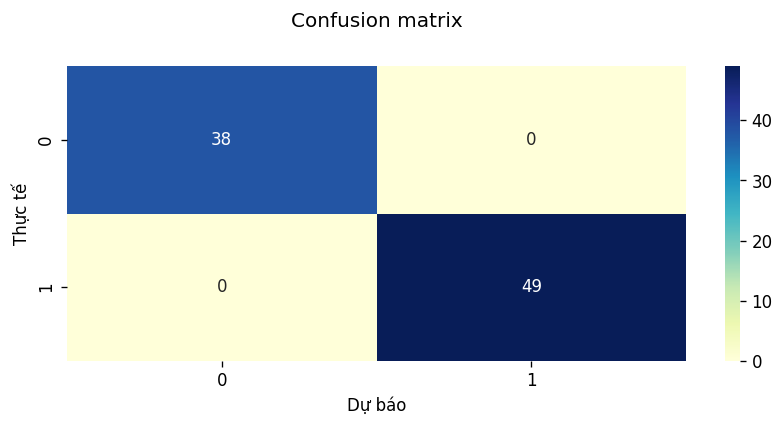

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
df_under 

,Paid,Lifetime Post Total Reach,Lifetime Engaged Users,Total Interactions
148,0.0,4202,562,1009
318,0.0,2232,374,218
310,0.0,2295,377,188
225,0.0,3706,895,86
209,0.0,2402,170,70
...,...,...,...,...
473,1.0,19800,479,97
474,1.0,18480,517,14
486,1.0,50128,2211,119
488,1.0,13720,537,115


In [ ]:
###### Chạy mô hình với data được normalize (Min-MaxScaler) 
from sklearn.preprocessing import MinMaxScaler 
scaler  = MinMaxScaler() 
scaler .fit(df_under) 
data_minmax= scaler.transform(df_under) 

In [ ]:
data_minmax

array([[0.        , 0.02083009, 0.04832649, 0.15929902],
       [0.        , 0.00988735, 0.03189723, 0.03441743],
       [0.        , 0.0102373 , 0.0321594 , 0.02968109],
       ...,
       [1.        , 0.27593485, 0.19243205, 0.0187875 ],
       [1.        , 0.07369965, 0.04614175, 0.01815598],
       [1.        , 0.06243473, 0.04124792, 0.04057468]])

In [ ]:
df_minmax = pd.DataFrame(data=data_minmax, columns=['Paid','Lifetime Post Total Reach','Lifetime Engaged Users','Total Interactions'])
df_minmax

,Paid,Lifetime Post Total Reach,Lifetime Engaged Users,Total Interactions
0,0.0,0.020830,0.048326,0.159299
1,0.0,0.009887,0.031897,0.034417
2,0.0,0.010237,0.032159,0.029681
3,0.0,0.018075,0.077427,0.013578
4,0.0,0.010832,0.014070,0.011051
...,...,...,...,...
283,1.0,0.107472,0.041073,0.015314
284,1.0,0.100140,0.044394,0.002210
285,1.0,0.275935,0.192432,0.018787
286,1.0,0.073700,0.046142,0.018156


In [ ]:
y = df_minmax["Paid"].values 
X = df_minmax[['Lifetime Post Total Reach','Lifetime Engaged Users','Total Interactions']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression() 

In [ ]:
model.fit(X_train, y_train) 
y_pred= model.predict(X_test) 

In [ ]:
#Độ chính xác của mô hình 
model.score(X_test,y_test) 

0.5172413793103449

In [ ]:
#Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB 
GNB = GaussianNB() #Gán mô hình từ thư viện vào biến GNB
GNB.fit(X_train, y_train) # Training mô hình
y_pred1=GNB.predict(X_test) #Dự báo 

In [ ]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred1) #Tính độ chính xác của mô hình 

0.5172413793103449

In [ ]:
#Classification with Decision Tree
from sklearn import tree #Gọi mô hình và training đơn giản như các thuật toán đã học ở bài trước
model_tree = tree.DecisionTreeClassifier() 
model_tree.fit(X_train, y_train) #Training mô hình

DecisionTreeClassifier()

In [ ]:
#Đánh giá độ chính xác của mô hình
model_tree.score(X_test,y_test)

0.5057471264367817

In [ ]:
#Classification with Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=5) #số lượng các cây quyết định được sử dụng trong mô hình 
model_rf.fit(X_train, y_train)
score = model_rf.score(X_train, y_train)
score

0.9651741293532339

In [ ]:
#KNN - KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3) 
model_knn.fit(X,y)#Training
model_knn.score(X_test,y_test)

0.8275862068965517

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
model = SVC(kernel='linear', C= 0.1, gamma=0.3) # Sử dụng Linear Kernel
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

In [ ]:
#Đánh giá độ chính xác của mô hình
from sklearn import metrics
from sklearn.metrics import classification_report#, plot_confusion_matrix
metrics.accuracy_score(y_test, y_pred2)

0.5057471264367817

In [ ]:
#Tính bằng phương pháp BaggingClassifier
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(LogisticRegression(),random_state=10)
bag.fit(X_train, y_train)
accuracy_bag = bag.score(X_test,y_test)
y_pred=bag.predict(X_test)

In [ ]:
print("Accuracy: {:.2f}".format(accuracy_bag))

Accuracy: 0.52


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(LogisticRegression())
ada.fit(X_train, y_train)
accuracy_ada = ada.score(X_test, y_test)

print("Accuracy: {:.2f}".format(accuracy_ada))

Accuracy: 0.51


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Gra = GradientBoostingClassifier()
Gra.fit(X_train, y_train)
accuracy_gra = Gra.score(X_test, y_test)
print("Accuracy: {:.2f}".format(accuracy_gra))

Accuracy: 0.55


In [ ]:
df1 = df[['Page total likes','Post Month','Post Weekday','Post Hour','Paid','Lifetime Post Total Reach','Lifetime Engaged Users','comment',
          'like','share','Total Interactions']]
df1

,Page total likes,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Engaged Users,comment,like,share,Total Interactions
1,81370,1,4,11,0.0,4156,626,4,79.0,17.0,100
2,81370,1,5,2,0.0,3778,625,5,137.0,10.0,152
3,81370,1,5,8,0.0,3480,537,0,66.0,14.0,80
4,85093,1,1,2,0.0,8412,1179,19,325.0,49.0,393
5,85093,1,7,10,0.0,5400,810,3,113.0,26.0,142
...,...,...,...,...,...,...,...,...,...,...,...
495,139441,12,5,10,0.0,3112,208,1,105.0,46.0,152
496,139441,12,5,10,0.0,2847,193,1,79.0,30.0,110
497,139441,12,4,3,0.0,2752,178,2,56.0,25.0,83
498,139441,12,5,3,0.0,2549,249,1,44.0,21.0,66


In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df1.values) 
data_scaled = pd.DataFrame(data_scaled, columns=df1.columns)
data_scaled.head()

,Page total likes,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Engaged Users,comment,like,share,Total Interactions
0,0.998667,0.000012,0.000049,0.000135,0.0,0.051007,0.007683,0.000049,0.000970,0.000209,0.001227
1,0.998891,0.000012,0.000061,0.000025,0.0,0.046378,0.007672,0.000061,0.001682,0.000123,0.001866
2,0.999064,0.000012,0.000061,0.000098,0.0,0.042728,0.006593,0.000000,0.000810,0.000172,0.000982
3,0.995037,0.000012,0.000012,0.000023,0.0,0.098366,0.013787,0.000222,0.003800,0.000573,0.004596
4,0.997945,0.000012,0.000082,0.000117,0.0,0.063330,0.009499,0.000035,0.001325,0.000305,0.001665


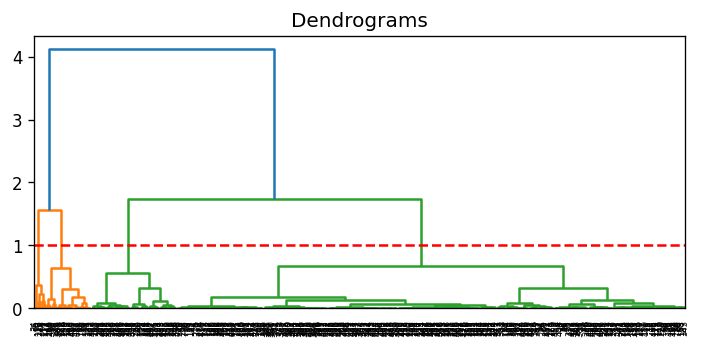

In [ ]:
import scipy.cluster.hierarchy as shc 
plt.title("Dendrograms") 
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward')) 
plt.axhline(y=1, color='r', linestyle='--') 
#plt.axhline(y=2, color='green', linestyle='--') 